# Lab Exercises

In [22]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


1) Let random variable $X$ be the number we get when we roll a die,    
    1. Write out the probability mass function of X.     
    2. Calculate the mean of X.  
    3. Calculate the variance of X.  

$1. P(X=N) = 1/6, for N in [1,6]$

$2. E[X] = sum(1/6*N)/6 = 3.5$

$3. var(X) = sum from N=1 to 6: (N-3.5)**2 * 1/6 = 2.9$

In [164]:
sum1 = 0
for N in range(1,7):
    sum1 += 1/6*N
sum1
print(sum1)

# calculate var(X)
var_x = 0
for N in range(1,7):
    var_x += (N-3.5)**2 * 1/6

print("var", var_x)

3.5
var 2.916666666666667


2) Use either `randint` or `random_sample` to generate a series of 20 rolls. Use `.mean()` and `.var()` to calculate the sample mean and variance. How do these compare to the population mean and variance you calculated above? What if you increase the number of rolls to 2000. Are your estimates closer to the true statistics or further away?

In [165]:
r = randint(1, 7, 20)  # generate series of 20 rolls

mean = r.mean()
var = r.var()
print("mean20=", mean)
print("var20=", var)

# the mean is somewhat close to the theoretical mean and variance, but off because we're using a small sample.
# increasing n to 2k gives estimates closer to the theoretical values.

r = randint(1, 7, 2000)
mean = r.mean()
var = r.var()
print("mean2k=", mean)
print("var2k=", var)

# type(r)

mean20= 3.6
var20= 3.24
mean2k= 3.471
var2k= 2.912159


3) Now we have two dice, and X and Y are the numbers appear on each die respectively. Let Z be the sum of the numbers from the two dice,  
    1. Write out the probability mass function of Z.  
    2. Calculate the mean of Z.  
    3. Calculate the variance of Z.

1.

$f_X$(x) = 
$\begin{cases} 
     \frac{1}{36}, & x = 2\\
     \frac{2}{36}, & x = 3\\
     \frac{3}{36}, & x = 4\\
     \frac{4}{36}, & x = 5\\
     \frac{5}{36}, & x = 6\\
     \frac{6}{36}, & x = 7\\
     \frac{5}{36}, & x = 8\\
     \frac{4}{36}, & x = 9\\
     \frac{3}{36}, & x = 10\\
     \frac{2}{36}, & x = 11\\
     \frac{1}{36}, & x = 12\\
\end{cases}
$

In [ ]:
Mean_Z = 2*(1/36.)+3*(2/36.)+4*(3/36.)+5*(4/36.)+6*(5/36.)+7*(6/36.)+8*(5/36.)+9*(4/36.)+10*(3/36.)+11*(2/36.)+12*(1/36.)
Mean_Z

In [ ]:
Variance_Z = ((2-Mean_Z)**2)*(1/36.)+((3-Mean_Z)**2)*(2/36.)+((4-Mean_Z)**2)*(3/36.)+((5-Mean_Z)**2)*(4/36.)+((6-Mean_Z)**2)*(5/36.)+((7-Mean_Z)**2)*(6/36.)+((12-Mean_Z)**2)*(1/36.)+((11-Mean_Z)**2)*(2/36.)+((10-Mean_Z)**2)*(3/36.)+((9-Mean_Z)**2)*(4/36.)+((8-Mean_Z)**2)*(5/36.)
Variance_Z

In [166]:
#another way to get the mean
import itertools as it
die1 = [1,2,3,4,5,6]
die2 = [1,2,3,4,5,6]
dice = list(it.product(die1,die2))
roll_sums = pd.DataFrame([i+j for i,j in dice],columns={'die_sum'})
roll_sums = roll_sums.die_sum.value_counts().reset_index().rename(columns={'index':'dice_total','die_sum':'count'})
roll_sums.sort_values(by='dice_total')
roll_sums['probability'] = roll_sums['count']/36
roll_sums['dice_by_probability'] = roll_sums['dice_total']*roll_sums['probability']
roll_sums.dice_by_probability.sum()

6.999999999999998

4) Do the same as in (2) but with two dice as in (3). Again, check to see how $N$, the number of samples, affects your result.

In [143]:
# roll 2 dice 20 times
r = [sum(randint(1,7,2)) for _ in range(20)]

# print(type(r[0]))
r = numpy.asarray(r)
# print(type(r))

mean = r.mean()
var = r.var()
print("mean20=", mean)
print("var20=", var)

# the mean is somewhat close to the theoretical mean and variance, but off because we're using a small sample.
# increasing n to 2k gives estimates closer to the theoretical values.

r = [sum(randint(1,7,2)) for _ in range(2000)]
r = numpy.asarray(r)

mean = r.mean()
var = r.var()
print("mean2k=", mean)
print("var2k=", var)

mean20= 5.75
var20= 4.0875
mean2k= 6.9875
var2k= 5.68434375


5) Find the variance of each of the following bets from the class notes. Which bet is riskiest and which best is safest (where "risk" is assessed according to variance, not expected value)?

1. You get \$5 with probability 1.0.  
2. You get \$10 with probability 0.5, or \$0 with probability 0.5.  
3. You get \$5 with probability 0.5, \$10 with probability 0.25 and \$0 with probability 0.25.  
4. You get \$5 with probability 0.5, \$105 with probability 0.25 or lose \$95 with probability 0.25.  

expected value for each of these is 5.

#1. var_1 = $(0-5)**2*0 + ((5-5)**2*1) = 0$

#2. var_2 = $(10-5)**2 * .5 + (0-5)**2 * .5 = 25$

#3. var_3 = $(5-5)**2 * .5 + (10-5)**2 * .25 + (0-5)**2 * .25 =  12.5$

#4. var_4 = $(5-5)**2 * .5 + (105-5)**2 * .25 + (-95-5)**2 * .25 = 5000$

In [146]:
var_1 = (0-5)**2*0 + ((5-5)**2*1) 

var_2 = (10-5)**2 * .5 + (0-5)**2 * .5 

var_3 = (5-5)**2 * .5 + (10-5)**2 * .25 + (0-5)**2 * .25 

var_4 = (5-5)**2 * .5 + (105-5)**2 * .25 + (-95-5)**2 * .25 

print(var_1, var_2, var_3, var_4)

0 25.0 12.5 5000.0


6) Brandon Lang is a creative entrepreneur who has developed a novelty soap item called Jackpot to target consumers with a gambling habit. Inside each bar of Jackpot shower soap is a single rolled-up bill of U.S. currency. The currency (rolled up and sealed in shrink-wrap) is appropriately inserted into the soap mixture prior to the cutting and stamping procedure. The distribution of paper currency (per 1000 bars of soap) is given in the following table.  

|   Bill Denomination   |   Number of Bills |
|:---------------------:|:-----------------:|
|\$1                     | 520 |
|\$5                     | 260 |
|\$10                    | 120 |
|\$20                    | 70  |
|\$50                    | 29  |  
|\$100                   | 1   |
| Total                  | 1000|

1. What is the expected amount of money in a single bar of Jackpot soap?
2. What is the standard deviation of the money in a single bar of Jackpot soap?
3. How many bars of soap would a customer have to buy so that, on average, he or she has purchased three bars   containing a \$50 or \$100 bill?
4. If a customer buys 8 bars of soap, what is the probability that at least one of these bars contains a bill of \$20 or larger? 

#Expected amount of money:
#1. E[X] = 1*(520/1000.)+5*(260/1000.)+10*(120/1000.)+20*(70/1000.)+50*(29/1000)+100*(1/1000) = 5.97


#2. Variance = ((1-5.97)**2)*(520/1000.)+((5-5.97)**2)*((260/1000.)**2)+((10-5.97)**2)*(120/1000.)+((20-5.97)**2)*(70/1000.)+((50-5.97)**2)*(29/1000)+((100-5.97)**2)*(1/1000)
st_dev = Variance**0.5
st_dev = 9.68


#3. probability of getting 1 bar with a 50 or 100  = 30/1000 = .03, so # of bars to buy to expect 3 50s/100s = 100


#4. win means >=20.  P(at least 1 win) = 1-P(8 fails) = 1-.9**8 = .57

In [73]:
Variance = ((1-5.97)**2)*(520/1000.)+((5-5.97)**2)*((260/1000.)**2)+((10-5.97)**2)*(120/1000.)+((20-5.97)**2)*(70/1000.)+((50-5.97)**2)*(29/1000)+((100-5.97)**2)*(1/1000)
st_dev = Variance**0.5
st_dev

9.679776383780775

In [71]:
30/1000
3/.03
1-.9**8

0.5695327899999999

7) Write a function that randomly draws from the above distribution. 

1. Use it to simulate the answer to part 3 of the last question at least 20 times. How often do you get the expected result? 
2. Use it to simulate part 4 of the last question 100 times. How close does your simulation come to the true expected value?

In [93]:
import random
import pandas as pd
def draw_soap(draws):
    money_stack = []
    for i in range(draws):
        random_value = random.uniform(0,1)
        if 0 <= random_value and random_value < (520/1000.): 
            money_stack.append(1)
        if (520/1000.) <= random_value and random_value < (520/1000.)+(260/1000.): 
            money_stack.append(5)
        if (520/1000.)+(260/1000.) <= random_value and random_value < (520/1000.)+(260/1000.)+(120/1000.): 
            money_stack.append(10)
        if (520/1000.)+(260/1000.)+(120/1000.) <= random_value and random_value < (520/1000.)+(260/1000.)+(120/1000.)+(70/1000.):
            money_stack.append(20)
        if (520/1000.)+(260/1000.)+(120/1000.)+(70/1000.) <= random_value and random_value < (520/1000.)+(260/1000.)+(120/1000.)+(70/1000.)+(29/1000.):
            money_stack.append(50)
        if (520/1000.)+(260/1000.)+(120/1000.)+(70/1000.)+(29/1000.) <= random_value and random_value < 1:
            money_stack.append(100)
    return money_stack


def record_soap_draws(draw_sets,num_draws):
    bill_count_record = []
    for i in range(draw_sets):
        money_count = pd.DataFrame(draw_soap(num_draws),columns={'value'})
        # create data frame to count number of times value is 50 or 100
        bill_count_record.append(len(money_count.loc[(money_count.value==50)|(money_count.value==100)]))
    return bill_count_record

In [94]:
import seaborn as sns

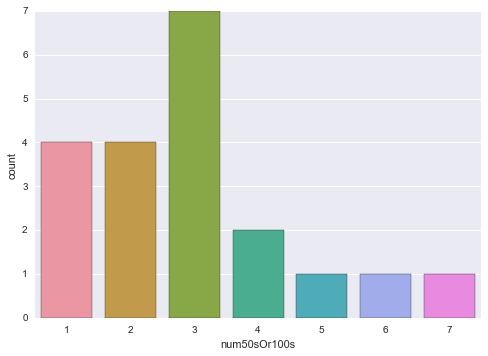

In [100]:
num50sOr100s_counts = pd.DataFrame(record_soap_draws(20,100),columns={'num50sOr100s'})
num50sOr100s_counts
sns.countplot(x='num50sOr100s',data=num50sOr100s_counts)

# in this simulation, we obtain the expected result of 3 bars in 7 (which is the count of the 3rd bar) out of 20 trials

# in this simulation, we obtain the expected result of 3 bars in 7 (which is the count of the 3rd bar) out of 20 trials

In [102]:
def record_soap_draws_20orLarger(draw_sets,num_draws):
    bill_count_record = []
    for i in range(draw_sets):
        money_count = pd.DataFrame(draw_soap(num_draws),columns={'value'})
        bill_count_record.append(len(money_count.loc[(money_count.value==20)|(money_count.value==50)|(money_count.value==100)]))
    return bill_count_record


num20s50sOr100s_counts = pd.DataFrame(record_soap_draws_20orLarger(100,8),columns={'occurances'})
len(num20s50sOr100s_counts.loc[num20s50sOr100s_counts.occurances>0])/len(num20s50sOr100s_counts)
#num20s50sOr100s_counts

# in 100 trials, the simulation returned .56, which is very close to the theoretical value of .57.

0.56

# in 100 trials, the simulation returned .56, which is very close to the theoretical value of .57.

8) (Extra Credit) Think back to the coin tossing example we discussed at the beginning of the lecture, if we let $X$ be the number of heads we get from 10 coin tosses, what is the probability mass function of $X$? What are the mean and variance of $X$? (**Note**: You are not required to complete this problem, so don't spend too much time on this. This is just to get you to start thinking about the probabilities of events when we have multiple trials of an experiment - we will talk about this on Monday.)

Let X be the number of heads from 10 coin tosses.  Then X~binom(10, .5)
Then pmf is:
$C(n,k)*p^k*(1-p)**(n-k)$ = 

$C(10,k)*.5^k*(.5)**(10-k)$

k in [0,10]

mean = np = 10*.5 = 5

variance = np(1-p) = 5*.5 = 2.5

In [157]:
binomial(10, .5)

2